# Importando bibliotecas

In [65]:
#biblioteca de analise
import pandas as pd
import numpy as np
from summarytools import dfSummary
import sidetable as stb

#bibliotecas de vizualizacao
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
sns.set_theme(style="whitegrid")

#bibiotecas para machine learing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split as tts, GridSearchCV

#biblioteca para aviso de erros
import warnings

#importando biblioteca para deploy
import joblib


#bibliotecas para dicionario de hiperparamentros
from tables.file import parameters

warnings.filterwarnings('ignore',category=FutureWarning)
set_config(display="diagram")
sns.set_theme(style="whitegrid")




Funcao para prever o r2, MAE, MSE, MRSE do modelo


In [66]:
def evaluation(model,x_test, y_test):
    pred=model.predict(x_test)
    print("R2:" 
          ,r2_score(y_test, pred))
    print("MAE:"
          , mean_absolute_error(y_test, pred))
    print("MSE:", 
          mean_squared_error(y_test, pred))
    print("RMSE:", 
          np.sqrt(mean_squared_error(y_test, pred)))


In [67]:
#importando dataset
df=pd.read_excel("/Users/chenyenpin/Downloads/insurance.xlsx")
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Analise exploratoria

In [68]:
df.shape

(1341, 7)

In [69]:
#somando quantidade de valores NA
df.isna().sum()

idade                0
sexo                 3
imc                  0
quantidade_filhos    0
fumante              0
regiao               0
custos_seguro        0
dtype: int64

In [70]:
#entendendo quais os valores NaN da coluna Sexo
df[df["sexo"].isna()]

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
1259,30,NaN,40.09,0,no,northeast,0.0
1285,30,NaN,40.09,0,no,northeast,0.0
1331,30,NaN,40.09,0,no,northeast,0.0


In [71]:
#percentual de Na que temos em cada coluna
df.stb.missing()

,missing,total,percent
sexo,3,1341,0.223714
idade,0,1341,0.000000
imc,0,1341,0.000000
quantidade_filhos,0,1341,0.000000
fumante,0,1341,0.000000
regiao,0,1341,0.000000
custos_seguro,0,1341,0.000000


In [72]:
#descrevendo os dados
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,idade[int64],Mean (sd) : 39.2 (14.0)min < med < max:18.0 < 39.0 < 64.0IQR (CV) : 24.0 (2.8),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWklEQVR4nO3cS46iUBiG4f+0peIlEGOiMzfQSQ8csohebC+hBq7AHTgzMQYjXUREetBl+pKUVUAoPvR9pgYkJy8IJx5cnucGqPjS9AEAf3u69aFzbmBmvZL7PuV5/lJyWzyoN4N0zg2m0+l33/cnZXZ8OBz2zrkfRIkibl0he77vT8IwfAmCICmy0yiKvNVqNdntdj0zI0h82M2fbDOzIAiS2Wz2s8S+ByW2wYPjoQZSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJS3v3HOOrHYro/CLJhLKb7V21BZlnWNTPfOVdm89ad9RWucv54PJ6FYXhgMV1NQcZx3E3T9Ntiseh0Op1Cg2zWvrO+ylUuTVMvy7Kv/X7/mcV0NQV5Op2ePM8bLpfLZD6f74ts29KzvvSS4c1mM1mv18Pz+dyp6+DapNZ7yNFo9OlLaJt8QCizZHi/3zd2hVN8mLqrhxoeED5OdazuKkjjbRtFSI7VvQVpZrxtowi1sZIMssKUkX+5XLo1HJKspsaqrmk9uSCrTBldp1CSJHk2szJnfas0NVZ1TuvJBVllyujRplCaGqs6p/XkgrwqM2VUdQqlrbcKTYxV2e999eZ3ywb52bhV0ECQr7hV0ECQ/2nq5w+/8QddSCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISCFISHn3RQFRFHlFd3o8Hj0zsziOve12O2Rbtr16r6df+xm0rXMHRl8AAAAASUVORK5CYII="">",0(0.0%)
2,sexo[object],1. male2. female3. nan,676 (50.4%)662 (49.4%)3 (0.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bwYnbYBSF0fcbMclsJIzBJSQ9uIgUmyJURHowxlpkJrNRFtPA+Idcock5FTzMh42MblvXtSDhsPUB/D9aVT1X1dPWh+zQ27quL1sfsSfD6XT6MY7jcetD9mZZlltr7afgPm4Yx/F4uVxepml63fqYvbjf71/neT5er9enqhLbBw1VVdM0vZ7P599bH7Mzz1sfsDceEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERM1S9v5+19SF74vPqMyzLcpvn+Vjez3rIsiy3qnrb+o49sUHoZ4PwoGbKR4pvtj6+1TpYV3WwrOpjXfUgy6p+1lV9PLl38KcuMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmKsqx7ks+pnXdXBsqqPDUIfG4QO1lXEeEAgRmzEHFpr31trnrD45w5V9a2qvmx9CJ+fn1FixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERc6iqX1X1Z+tD+Pysq4jxM0rMX+dFczrBYnMXAAAAAElFTkSuQmCC"">",3(0.2%)
3,imc[float64],Mean (sd) : 30.7 (6.1)min < med < max:16.0 < 30.4 < 53.1IQR (CV) : 8.5 (5.0),550 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACVklEQVR4nO3bwYraUBSH8XPrOESFiFh05wsUunDpQ/Rh+wgVfALfwJ0QJGJqMMZ00YF2CjNDrjfNfzLfb38xi4+EY05cVVUGqPjU9gUAf3to+wJCc84NzOzR8/ilqqpzyOtBPZ0K0jk3mE6n3+I4nvicPx6PB+fcd6JsT6eCNLPHOI4nq9XqPB6P8zoH0zSNNpvNJEmSRzMjyJZ0LUgzMxuPx/lsNvvpcXQQ/GJQC0MNpBAkpHTyke2rLMu+mcXOOZ/jTOgBEOSTLMv6RVF8XSwWvV6vV2sgMmNCD4Ugn1wul4coiobL5TKfz+eHOmeZ0MMhyH+MRiMm9BYx1EAKQUIKQUIKQUIKQUIKQUKK5N8+d+w0xrfbrR/6evD/yAV5z05jURRRWZZf8jz/YWY+/yWiZXJB2h07jbvdbrLdbofX67XX1MWhWYpBmpnfTuPhcOBtyTvHUAMpBAkpBAkpBAkpskPNe8O2eRgEGQDb5uEQZABsm4dDkAGxbX4/hhpIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIaexNDR9qwUcjQfKhFnw1dYfkQy14aXS5gg+1UBdDDaSwfiaAbfM/CLJlbJs/R5AtY9v8OYIUwbb5bww1kEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkPLqmxq2vvV1bTHjxSDZ+tbXxcWM1+6QbH2L6+JixpvLFWx96/NdzCjLMjaxxz3bPh+U6uOeID+oex/36/V6liTJZ+fc0efnXwr5zSDTNI3q/trpdIrMzLIsi/b7/ZCzumd9nM/nxu6uvwCRxJ7xhL+7HgAAAABJRU5ErkJggg=="">",0(0.0%)
4,quantidade_filhos[int64],1. 02. 13. 24. 35. 46. 5,577 (43.0%)324 (24.2%)240 (17.9%)157 (11.7%)25 (1.9%)18 (1.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACwklEQVR4nO3dQU7bUBiF0T9RRJuJowiJZbCALKKL7SKygOwDRXjQUCbpoBRBB8DAvs+yz5kxe0KfXuTIV1ldr9eChHXrA7AcYiNGbMSIjZhVVW2r6qb1QSbi+Xq9XlofYq42t7e3P7qu27c+yBT0fX9erVY/BTeOTdd1+8PhcNntdk+tD9PS4+Pj9+PxuH94eLipKrGNYFNVtdvtnu7u7n61PswEbFsfYM48IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMZuqv6/XtD5Ia/4H49v0fX8+Ho/78npN9X1/rqrn1ueYK6+Fv+e18BGtjJRJmerN5oaZoUkOXgxP5mlygxfDk/ma6uBl8U/Gc+RLXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzETG5dNaWzMKxJrqusnO

In [73]:
#identificando os valores duplicados
df[df.duplicated()]

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
581,19,male,30.59,0,no,northwest,1639.5631
1285,30,NaN,40.09,0,no,northeast,0.0000
1331,30,NaN,40.09,0,no,northeast,0.0000


In [74]:
#excluindo as linhas em NA
df=df.dropna()

In [75]:
#separando as colunas de numericas e categoricas
cat_col=df.select_dtypes(exclude="number").columns
num_col=df.select_dtypes("number").columns
cat_col, num_col

(Index(['sexo', 'fumante', 'regiao'], dtype='object'),
 Index(['idade', 'imc', 'quantidade_filhos', 'custos_seguro'], dtype='object'))

# analise exploratoria usado graficos

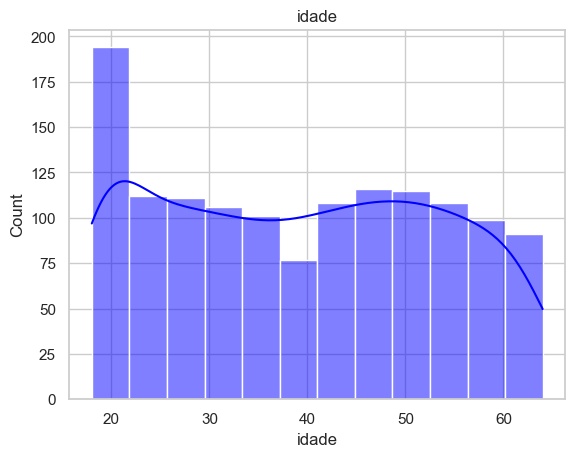

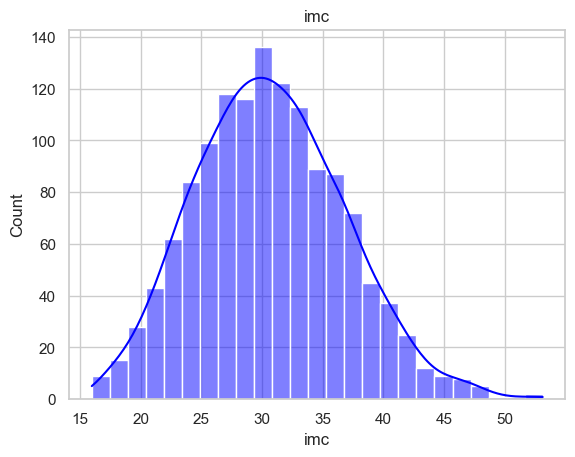

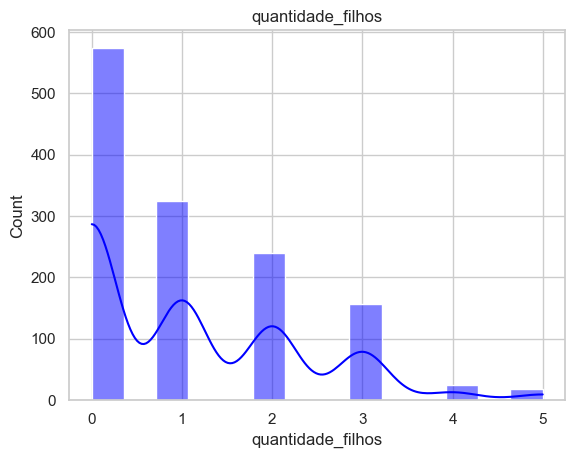

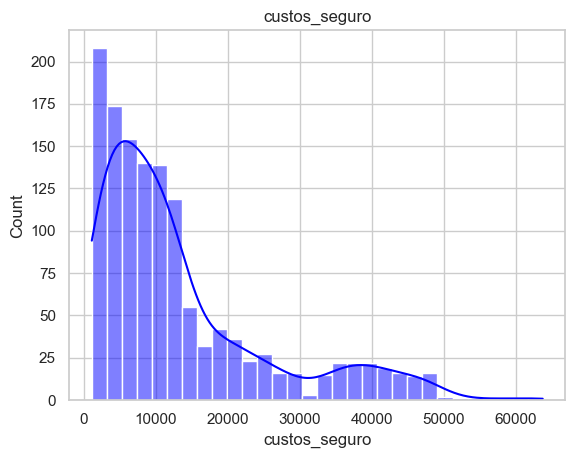

In [76]:
for col in num_col:
    sns.histplot(data=df, x=col, kde=True, color="blue")
    plt.xlabel(col)
    plt.title(col)
    plt.show()


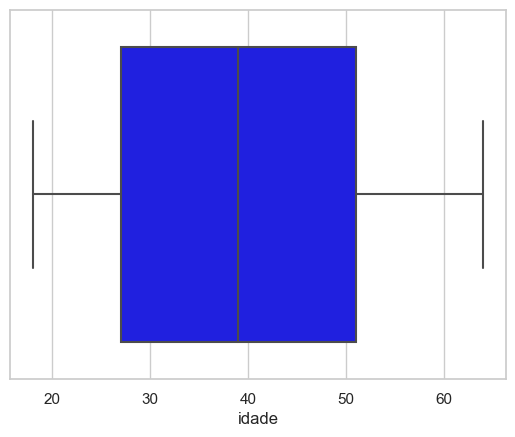

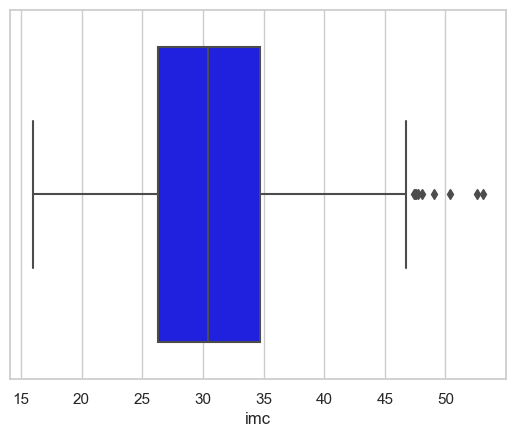

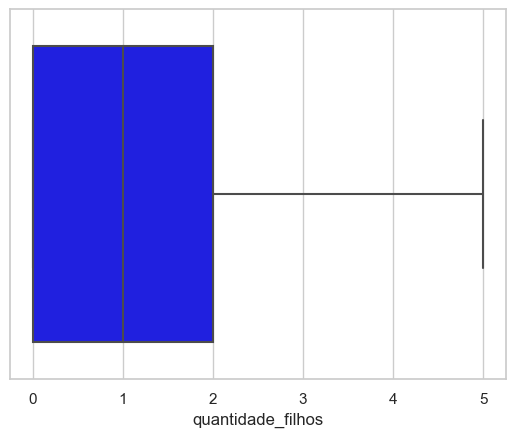

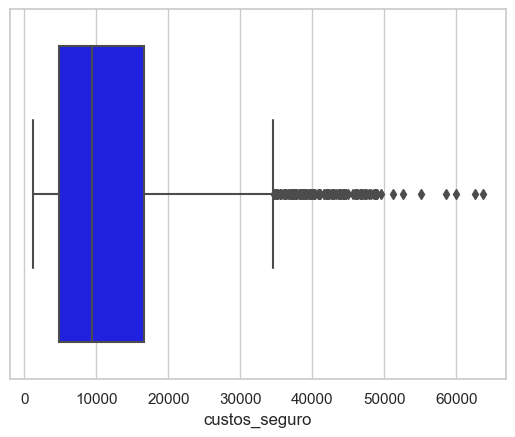

In [77]:
#usando a funcao loop para criarmos os graficos de boxplot
for num in num_col:
    sns.boxplot(data=df, x=num, orient="h", color="blue")
    plt.show()

# Analisando os dados e algum comportamento padrao

In [78]:
# quantidade de pessoas com IMC acima de 45
df.loc[(df["imc"]>45)]


,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


In [79]:
#entendendo percentual medio de IMC masculino e feminino
(df.groupby(["sexo","fumante"])
 .agg({"imc":"mean"})
 .reset_index()
 .sort_values("imc", ascending=False))

,sexo,fumante,imc
3,male,yes,31.504182
2,male,no,30.771663
0,female,no,30.539525
1,female,yes,29.608261


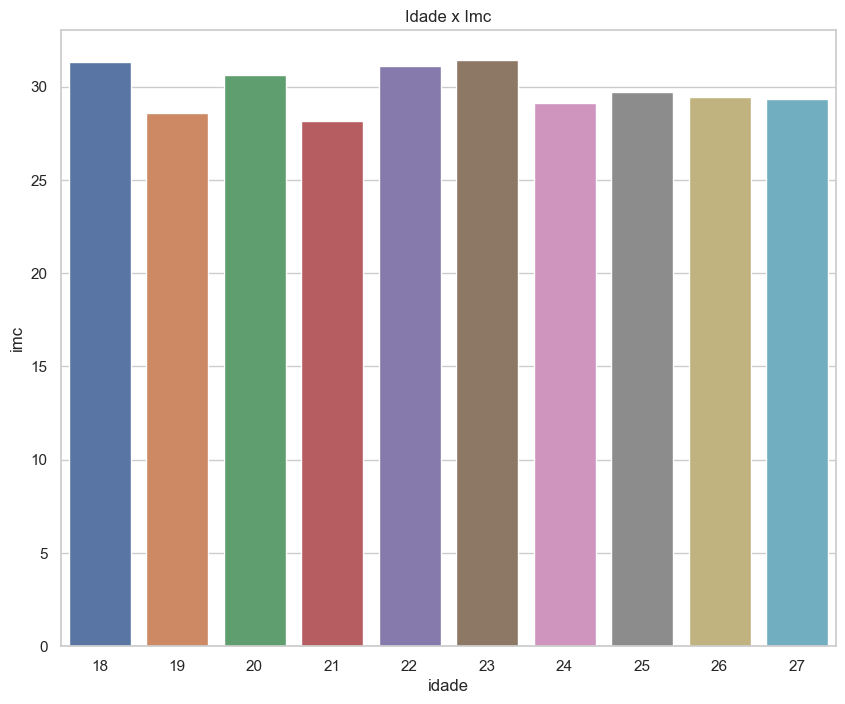

In [80]:
#entendedo imc de idade
#parametro 1 -> qual dataframe, parametro 2-> vamos puxar quantas linhas para no nosso dataset novo
def imc_idade(df:pd.DataFrame, n=int)->pd.DataFrame:
    imc=(df
    .groupby(["idade"])
    .agg({"imc":"mean"})
    .reset_index()
    .head(n)
    .sort_values("imc", ascending=False))
    return imc


imc_plot=imc_idade(df,10)
plt.figure(figsize=(10,8))
sns.barplot(data=imc_plot, x="idade", y= "imc").set(title="Idade x Imc")
plt.show()




In [81]:
#entendendo valores de cota para regiao
regiao_custo=(df.groupby(["regiao"])
           .agg({"custos_seguro":"mean"})
           .sort_index()
           .sort_values("custos_seguro", ascending=False))

regiao_custo

,custos_seguro
regiao,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


Entendendo  a correlacao dos valores

In [82]:
df[num_col].corr().T

,idade,imc,quantidade_filhos,custos_seguro
idade,1.000000,0.109214,0.042469,0.299008
imc,0.109214,1.000000,0.012867,0.198285
quantidade_filhos,0.042469,0.012867,1.000000,0.067998
custos_seguro,0.299008,0.198285,0.067998,1.000000


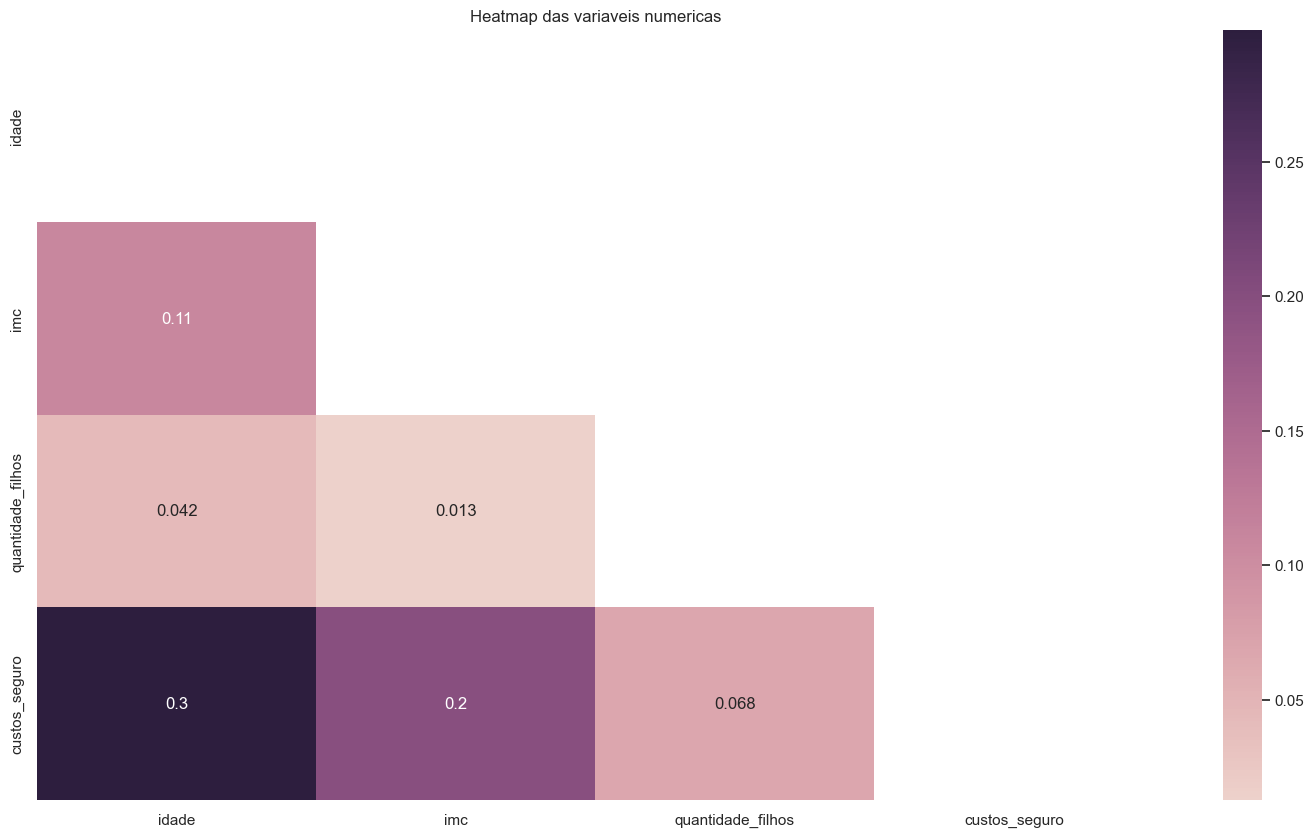

In [83]:

df_corr=df[num_col].corr()

#cria uma matriz triangular superior com zeros nas diagonais 
mask=np.triu(np.ones_like(df_corr))

#plotando heatmap
plt.figure(figsize=(18,10))
sns.heatmap(data=df_corr,mask=mask, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.title("Heatmap das variaveis numericas")
plt.show()


# Preprocessing

* Transformando o as colunas categoricas para Label Enconder

In [84]:
label=LabelEncoder()
for cat in cat_col:
    df[cat]=label.fit_transform(df[cat])

df


/var/folders/s2/z2r_n2517y18_q1zxtj3m5lw0000gn/T/ipykernel_14391/2351497991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat]=label.fit_transform(df[cat])


,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.560,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1336,50,1,30.970,3,0,1,10600.54830
1337,18,0,31.920,0,0,0,2205.98080
1338,18,0,36.850,0,0,2,1629.83350
1339,21,0,25.800,0,0,3,2007.94500


In [85]:
#puxando nome de todas as colunas
columns=df.columns.to_list()
columns

['idade',
 'sexo',
 'imc',
 'quantidade_filhos',
 'fumante',
 'regiao',
 'custos_seguro']

In [86]:
df.head(1)

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.9,0,1,3,16884.924


* Normalizando os dados usando Robust Scaler

In [87]:
#normalizando nos valores usando robustsacaler
robust=RobustScaler()
df_norm=pd.DataFrame(robust.fit_transform(df).tolist(),
             columns=robust.get_feature_names_out())

df_norm.head(1)




,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,-0.833333,-1.0,-0.297708,-0.5,1.0,1.0,0.630515


* Determinando a target e a colunas explicativas

In [88]:
x=df_norm.drop(columns="custos_seguro")
y=df_norm["custos_seguro"]
    


* Separando os dados em x,y treino e teste, com proporcao de 70/30, random state 42

In [89]:
x_train, x_test, y_train, y_test= tts(x,y, test_size=0.3, random_state=42)


# Instanciando e treinando o modelos

In [90]:
tree=DecisionTreeRegressor()
tree.fit(x_train, y_train)
evaluation(tree, x_test, y_test)



R2: 0.7206919251914028
MAE: 0.25199294120154725
MSE: 0.28921638204396916
RMSE: 0.5377884175435254


In [91]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

evaluation(ada, x_test, y_test)


R2: 0.8276284920005142
MAE: 0.3226098760383921
MSE: 0.17848629670029106
RMSE: 0.4224763859676551


In [92]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

evaluation(rf, x_test, y_test)

R2: 0.8566264458590184
MAE: 0.20823963983893626
MSE: 0.14845965566106686
RMSE: 0.38530462709532426


In [93]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)

evaluation(gbr, x_test, y_test)


R2: 0.8689369710587296
MAE: 0.20503235435150013
MSE: 0.13571242104652362
RMSE: 0.3683916679928085


In [94]:
xgbr=XGBRegressor()
xgbr.fit(x_train, y_train)
evaluation(xgbr, x_test, y_test)

R2: 0.8259856694892528
MAE: 0.23717174720970363
MSE: 0.18018739747717702
RMSE: 0.4244848613050612


# Utilizando o  Voting regressor para criar um modelo hibrido

In [95]:
voting=VotingRegressor([("xgbr",xgbr),("rf", rf) ,("gbr", gbr) ])
voting.fit(x_train, y_train)

evaluation(voting, x_test, y_test)

R2: 0.8597650351513345
MAE: 0.20717379587445892
MSE: 0.14520972656228354
RMSE: 0.3810639402544979


# Melhor modelo foi o Gradientboost, nessa fase vamos trabalhar os hiperparamentros para tentar melhorar o modelo

In [96]:
#passando parametros para treino
parameters= {'learning_rate': [0.01], 
        'max_depth': [4], 
        'n_estimators': [500],
          'subsample': [0.5]
          }
                

In [97]:
#instanciando o modelo gradientboostregressor e atribundo a variavel gbrtuned
gbrtuned=GradientBoostingRegressor()

In [98]:
#treinando o modelo GRIDSEARCHCV
grid=GridSearchCV(estimator=gbrtuned, param_grid=parameters, cv=5, n_jobs=-1,scoring="r2")



In [99]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [500], 'subsample': [0.5]},
             scoring='r2')

In [100]:
print("Best estimator across ALL searched params:\n", grid.best_estimator_)
print("\nBest scores across all searched params:\n", grid.best_score_)
print("\nBest paramenters acorss all searched params: \n", grid.best_params_)

Best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.5)

Best scores across all searched params:
 0.834662258593505

Best paramenters acorss all searched params: 
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [101]:
best_model=grid.best_estimator_

In [102]:
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [103]:
gbrtuned=GradientBoostingRegressor(alpha= 0.9,
 ccp_alpha= 0.0,
 criterion= 'friedman_mse',
 init= None,
 learning_rate= 0.01,
 loss= 'squared_error',
 max_depth = 4,
 max_features= "sqrt",
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_iter_no_change= None,
 random_state= None,
 subsample= 1,
 tol= 0.0001,
 validation_fraction= 0.1,
 verbose= 0,
 warm_start= False

)

In [104]:
gbrtuned.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          n_estimators=500, subsample=1)

In [105]:
evaluation(gbrtuned, x_test, y_test)

R2: 0.8755637051146811
MAE: 0.2057659468981234
MSE: 0.12885060708091156
RMSE: 0.3589576675332504


# Comparando com os modelos que tiveram normalizacao dos dados

In [106]:
X=df.drop(columns="custos_seguro")
Y=df["custos_seguro"]

In [107]:
X_train, X_test, Y_train, Y_test=tts(X, Y, test_size=0.3, random_state=42)

In [108]:
treeD=DecisionTreeRegressor()
treeD.fit(X_train, Y_train)
evaluation(treeD, X_test, Y_test)

R2: 0.7103344346213061
MAE: 2919.000177833334
MSE: 42472013.04441173
RMSE: 6517.055550201466


In [109]:
adaD=AdaBoostRegressor()
adaD.fit(X_train, Y_train)

evaluation(adaD, X_test, Y_test)

R2: 0.8286317947575557
MAE: 3948.7906285999456
MSE: 25126744.488731958
RMSE: 5012.658425300088


In [110]:
rfD=RandomForestRegressor()
rfD.fit(X_train, Y_train)

evaluation(rfD, X_test, Y_test)

R2: 0.8522209961570437
MAE: 2530.8269551544786
MSE: 21667994.159756865
RMSE: 4654.889274704272


In [111]:
gbrD=GradientBoostingRegressor()
gbrD.fit(X_train, Y_train)

evaluation(gbrD, X_test, Y_test)

R2: 0.8693065097319579
MAE: 2429.418533685369
MSE: 19162842.55681938
RMSE: 4377.538412946182


In [112]:
xgbrD=XGBRegressor()
xgbrD.fit(X_train, Y_train)


evaluation(xgbrD, X_test, Y_test)

R2: 0.8203838324643942
MAE: 2844.553801996077
MSE: 26336096.25150361
RMSE: 5131.870638617424


# Utilizando o  Voting regressor para criar um modelo hibrido

In [113]:
votingD=VotingRegressor([("xgbrD",xgbrD),("rfD", rfD) ,("gbrD", gbrD) ])
votingD.fit(X_train, Y_train)

evaluation(votingD, X_test, Y_test)

R2: 0.8564357536750253
MAE: 2475.8462712185074
MSE: 21050008.255741253
RMSE: 4588.028798486475


# Melhor modelo foi o Gradientboost, nessa fase vamos trabalhar os hiperparamentros para tentar melhorar o modelo

In [114]:
#passando parametros para treino
parameters= {'learning_rate': [0.01], 
        'max_depth': [4], 
        'n_estimators': [500],
          'subsample': [0.5]
          }

In [115]:
#instanciando o modelo gradientboostregressor e atribundo a variavel gbrtuned
gbrtuneD=GradientBoostingRegressor()

In [116]:
#treinando o modelo GRIDSEARCHCV
griD=GridSearchCV(estimator=gbrtuned, param_grid=parameters, cv=5, n_jobs=-1,scoring="r2")



In [117]:
griD.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 max_features='sqrt',
                                                 n_estimators=500,
                                                 subsample=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [500], 'subsample': [0.5]},
             scoring='r2')

In [118]:
print("Best estimator across ALL searched params:\n", griD.best_estimator_)
print("\nBest scores across all searched params:\n", griD.best_score_)
print("\nBest paramenters acorss all searched params: \n", griD.best_params_)

Best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          n_estimators=500, subsample=0.5)

Best scores across all searched params:
 0.8391769840748964

Best paramenters acorss all searched params: 
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [119]:
best_moDel=griD.best_estimator_

In [120]:
best_moDel.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [121]:
gbrtuneD=GradientBoostingRegressor(alpha= 0.9,
 ccp_alpha= 0.0,
 criterion= 'friedman_mse',
 init= None,
 learning_rate= 0.01,
 loss= 'squared_error',
 max_depth = 4,
 max_features= "sqrt",
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_iter_no_change= None,
 random_state= None,
 subsample= 1,
 tol= 0.0001,
 validation_fraction= 0.1,
 verbose= 0,
 warm_start= False

)

In [122]:
gbrtuneD.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          n_estimators=500, subsample=1)

In [123]:
evaluation(gbrtuneD, X_test, Y_test)

R2: 0.8753371542022428
MAE: 2486.964003185491
MSE: 18278603.48520832
RMSE: 4275.348346650635


# Salvando modelo treinado para futuro deploy

In [124]:
# save the model to a file
joblib.dump(gbrtuneD, 'gradientboosttuned.joblib')

['gradientboosttuned.joblib']

In [125]:
gbrtuneD=joblib.load('gradientboosttuned.joblib')

In [130]:
prediction=gbrtuneD.predict(X_test)
prediction

array([10419.41291865,  6277.49749368, 27743.39203956, 10201.23822489,
       33526.0953606 ,  5571.00133014,  2768.88115955, 15075.63054581,
        5009.98918694, 10943.8101756 , 19338.6561337 ,  7929.57495586,
        5010.36834798, 43366.756621  , 46739.30756526, 43255.96453973,
       10985.11474786, 43922.98488942, 10055.72015195, 24905.78475901,
        5548.58926538,  9061.19554451,  2716.04613254,  4303.43663606,
       12399.08882893, 12729.37874031, 15258.4819593 ,  6905.65216524,
       11901.77154511,  3228.35253364,  7660.32384953, 12258.13584489,
        3428.05106273,  6615.52765347,  5026.82897489, 10529.43389753,
        4296.89841689,  8609.7457052 , 26406.93539578, 39132.8814767 ,
        5432.28210897,  5406.67603119, 13195.36127202, 13454.98291898,
        7407.13135821, 14840.8044049 ,  6919.40214797,  6693.15476058,
       42089.53677273,  6778.42515659, 14743.89412365,  3629.49990342,
        7197.32352647,  2564.92452253, 12454.93699158, 12185.74594498,
      